In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys, os
PROJECT_ROOT = '/content/drive/MyDrive/Duke Undergrad/Senior/Applied Machine Learning/Final Project'
sys.path.insert(0, os.path.join(PROJECT_ROOT, 'src'))
os.chdir(PROJECT_ROOT)

In [4]:
!pip install -q torch torchvision timm grad-cam tensorboard tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#Run regressor training
%cd "/content/drive/MyDrive/Duke Undergrad/Senior/Applied Machine Learning/Final Project"

!PYTHONPATH=src python src/train_regressor.py \
    --data_root data/nutrition5k \
    --dataset_type nutrition5k \
    --backbone resnet50 \
    --epochs 25 \
    --batch_size 32 \
    --num_workers 2 \
    --lr 1e-3

/content
2025-12-05 09:52:20.066849: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-05 09:52:20.084042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764928340.105137    5628 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764928340.111642    5628 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764928340.127806    5628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid

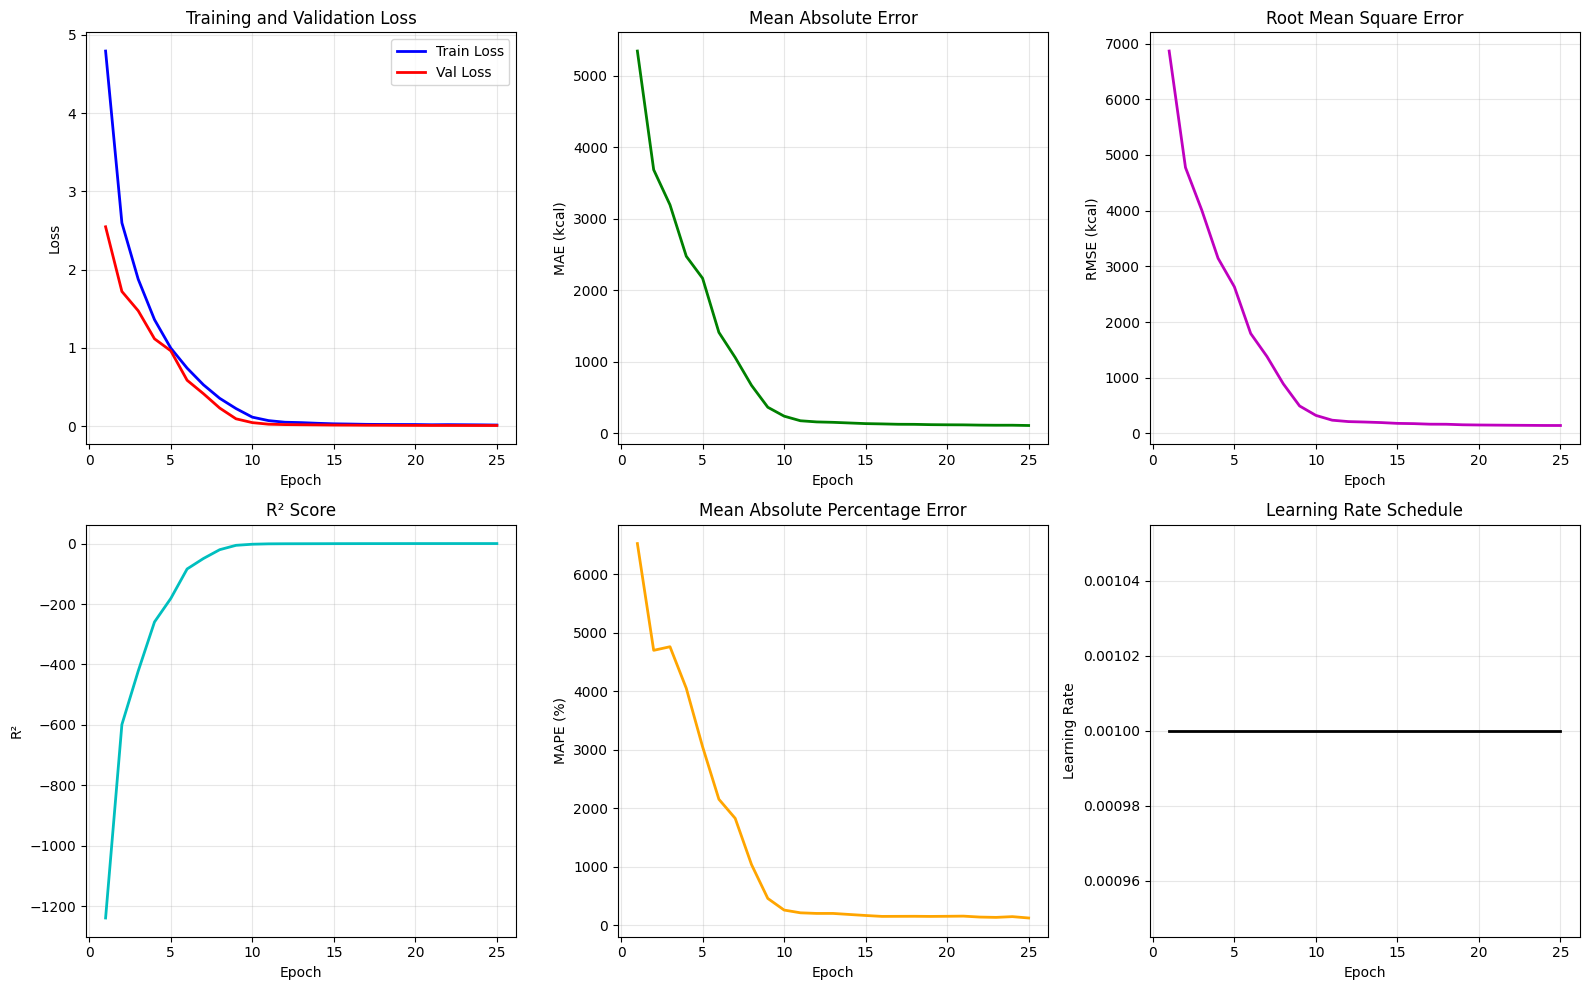

Saved to artifacts/figures/regressor_training_curves.png


In [ ]:
# This cell was generated using AI. There were some serialization issues, so I had the AI assistant generate the code for the training curves described by the data above
import matplotlib.pyplot as plt

# training history from the output. 
history = {
    'train_loss': [4.7910, 2.5975, 1.8782, 1.3617, 0.9979, 0.7426, 0.5300, 0.3571, 0.2264, 0.1166, 0.0724, 0.0518, 0.0468, 0.0382, 0.0314, 0.0285, 0.0248, 0.0234, 0.0226, 0.0222, 0.0194, 0.0209, 0.0196, 0.0182, 0.0160],
    'val_loss': [2.5472, 1.7215, 1.4751, 1.1169, 0.9634, 0.5877, 0.4165, 0.2327, 0.0954, 0.0467, 0.0265, 0.0216, 0.0197, 0.0179, 0.0157, 0.0150, 0.0135, 0.0132, 0.0119, 0.0113, 0.0109, 0.0106, 0.0104, 0.0101, 0.0100],
    'mae': [5342.0, 3682.5, 3191.6, 2472.5, 2165.0, 1408.1, 1057.2, 667.8, 361.5, 237.0, 172.6, 156.4, 150.7, 141.7, 132.7, 128.6, 123.5, 122.5, 118.0, 116.2, 115.2, 111.7, 110.0, 110.2, 106.3],
    'rmse': [6865.7, 4774.5, 4008.8, 3144.2, 2631.9, 1793.8, 1379.7, 889.8, 492.4, 323.0, 236.7, 211.6, 203.8, 194.1, 179.7, 175.1, 165.1, 164.0, 154.4, 150.6, 148.3, 146.0, 144.2, 142.1, 141.5],
    'r2': [-1239.685, -599.003, -421.984, -259.199, -181.321, -83.689, -49.104, -19.841, -5.381, -1.746, -0.475, -0.178, -0.093, 0.009, 0.150, 0.193, 0.282, 0.292, 0.372, 0.403, 0.421, 0.439, 0.452, 0.468, 0.473],
    'mape': [6526.6, 4701.2, 4762.8, 4052.1, 3052.8, 2155.2, 1829.1, 1039.2, 459.8, 261.2, 214.1, 203.5, 203.6, 185.8, 168.3, 152.9, 153.8, 154.7, 152.5, 154.6, 157.4, 141.4, 135.9, 148.8, 125.4]
}

epochs = range(1, 26)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Loss curves
axes[0, 0].plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
axes[0, 0].plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# MAE
axes[0, 1].plot(epochs, history['mae'], 'g-', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MAE (kcal)')
axes[0, 1].set_title('Mean Absolute Error')
axes[0, 1].grid(True, alpha=0.3)

# RMSE
axes[0, 2].plot(epochs, history['rmse'], 'm-', linewidth=2)
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('RMSE (kcal)')
axes[0, 2].set_title('Root Mean Square Error')
axes[0, 2].grid(True, alpha=0.3)

# R²
axes[1, 0].plot(epochs, history['r2'], 'c-', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('R²')
axes[1, 0].set_title('R² Score')
axes[1, 0].grid(True, alpha=0.3)

# MAPE
axes[1, 1].plot(epochs, history['mape'], 'orange', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_title('Mean Absolute Percentage Error')
axes[1, 1].grid(True, alpha=0.3)

# Learning rate (constant)
axes[1, 2].plot(epochs, [0.001]*25, 'k-', linewidth=2)
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Learning Rate')
axes[1, 2].set_title('Learning Rate Schedule')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Duke Undergrad/Senior/Applied Machine Learning/Final Project/artifacts/figures/regressor_training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print("Saved to artifacts/figures/regressor_training_curves.png")